# Softmax Classifier: MNIST 

## Contents

1. Make some data
2. Softmax classifier
3. define model, criterion, optimizer
4. Analyze the result

In [1]:
# import libraries

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(1)

In [2]:
# Plot the data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1].item()))

## 1. Make some data

In [3]:
# Create and print the training data

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n", train_dataset)

Print the training dataset:
 Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None


In [4]:
# Create and print the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None


In [5]:
# Print the type of the element

print("Type of data.image element: ", train_dataset[0][0].type())
print("Type of data.label element: ", train_dataset[0][1].type())
print("Type of data.image element: ", train_dataset[0][0].size())
print("Type of data.label element: ", train_dataset[0][1].size())

Type of data.image element:  torch.FloatTensor
Type of data.label element:  torch.LongTensor
Type of data.image element:  torch.Size([1, 28, 28])
Type of data.label element:  torch.Size([])


In [6]:
# Print the label

print("The label: ", train_dataset[3][1])

The label:  tensor(1)


The image:  None


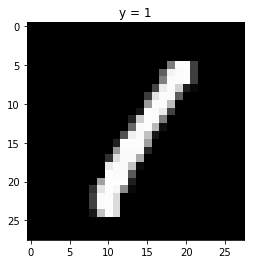

In [7]:
# Plot the image

print("The image: ", show_data(train_dataset[3]))

## 2. Build a softmax classifier

In [8]:
# Define softmax classifier class

class softmax_classifier(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(softmax_classifier, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        z = self.linear(x)
        return z

In [9]:
# Print the shape of train dataset

print("train_dataset[0][0].shape:", train_dataset[0][0].shape)

train_dataset[0][0].shape: torch.Size([1, 28, 28])


In [10]:
# Set input size and ouput size

input_dim = 28 * 28
output_dim = 10

## 3. Define softmax classifier model, criterion, optimizer

In [11]:
# Create the model object

model = softmax_classifier(input_dim, output_dim)

In [12]:
# define criterion, optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [13]:
# Create dataloader

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [14]:
# Train the model

accuracy_list = []
loss_list = []

def train_model(epochs):
    
    for epoch in range(epochs):
        
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1 ,28 * 28))
            _, yhat = torch.max(z, 1)
            correct += (y == yhat).sum().item()
        accuracy = correct / len(validation_dataset)
        accuracy_list.append(accuracy)
        loss_list.append(loss.data)
        
train_model(2)

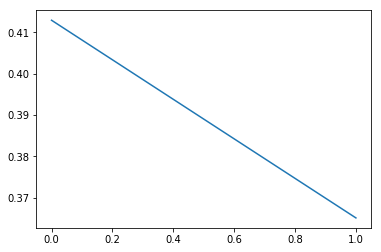

In [15]:
# plot the loss

plt.plot(loss_list)

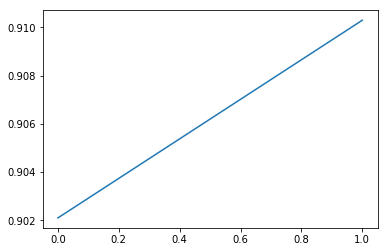

In [16]:
# plot the accuracy

plt.plot(accuracy_list)

In [17]:
# make a prediction

out = model(train_dataset[0][0].view(-1, 28 * 28))

_, out = torch.max(out, -1)
out

tensor([5])

In [18]:
train_dataset[0][1]

tensor(5)